<a href="https://colab.research.google.com/github/carlo-coding/curso_deep_learning/blob/main/modelo_fashion_convolutional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np


In [31]:
# Cargar los datos
fashion = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion.load_data()

In [56]:
class_names = [
  "T-shirt/top",
  "Trouser",
  "Pullover",
  "Dress",
  "Coat",
  "Sandal",
  "Shirt",
  "Sneaker",
  "Bag",
  "Ankle boot"
]

In [32]:
# Preprocesar los datos
x_train = x_train.astype("float64") / 255.0
x_test = x_test.astype("float64") / 255.0

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [37]:
# Preparar el modelo 
model = keras.Sequential()

model.add(Conv2D(32, (5, 5), activation="tanh", input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (5, 5), activation="tanh"))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation="tanh"))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(32, activation="tanh"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 batch_normalization_20 (Bat  (None, 4, 4, 64)         256       
 chNormalization)                                                
                                                     

In [38]:
# Configurar el modelo
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [39]:
reduce_lr = keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x )

In [40]:
# Entrenamiento 
model.fit(x_train, y_train, epochs=30, batch_size=50, callbacks=[reduce_lr])

Epoch 1/30
1200/1200 [==============================] - 70s 58ms/step - loss: 0.6514 - accuracy: 0.7838 - lr: 0.0010
Epoch 2/30
1200/1200 [==============================] - 69s 57ms/step - loss: 0.4394 - accuracy: 0.8545 - lr: 9.0000e-04
Epoch 3/30
1200/1200 [==============================] - 69s 57ms/step - loss: 0.3930 - accuracy: 0.8690 - lr: 8.1000e-04
Epoch 4/30
1200/1200 [==============================] - 69s 57ms/step - loss: 0.3562 - accuracy: 0.8832 - lr: 7.2900e-04
Epoch 5/30
1200/1200 [==============================] - 69s 57ms/step - loss: 0.3356 - accuracy: 0.8887 - lr: 6.5610e-04
Epoch 6/30
1200/1200 [==============================] - 69s 57ms/step - loss: 0.3165 - accuracy: 0.8939 - lr: 5.9049e-04
Epoch 7/30
1200/1200 [==============================] - 69s 57ms/step - loss: 0.2954 - accuracy: 0.9026 - lr: 5.3144e-04
Epoch 8/30
1200/1200 [==============================] - 69s 58ms/step - loss: 0.2794 - accuracy: 0.9073 - lr: 4.7830e-04
Epoch 9/30
1200/1200 [==============

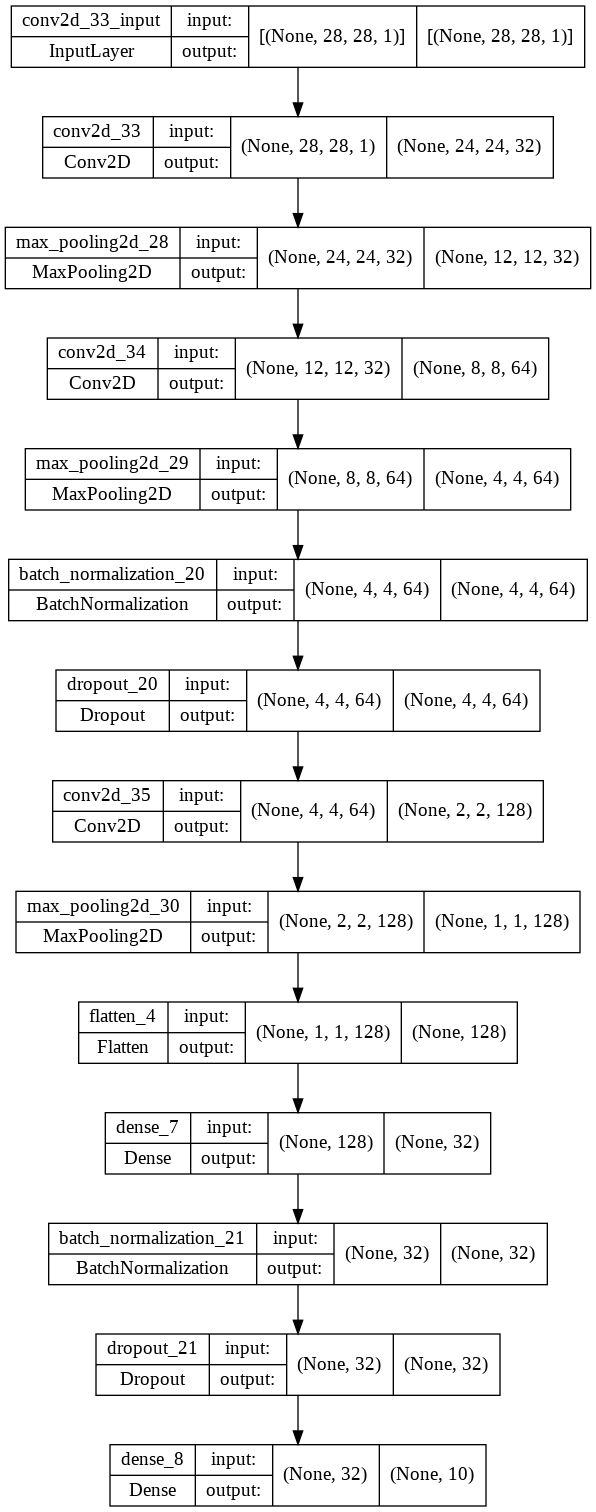

In [45]:
plot_model(model, "neural_network.png", show_shapes=True)

In [47]:
# Evaluación 
loss, acc = model.evaluate(x_test, y_test)
print(f"Accuracy: {acc}")

313/313 [==============================] - 4s 12ms/step - loss: 0.2752 - accuracy: 0.9187
Accuracy: 0.9186999797821045


In [54]:
predictions = model.predict(x_test)

x_test_visual = x_test.reshape(10000, 28, 28)

In [76]:
def plot_image(index, predictions_array, true_label, image):
  predictions_array, true_label, image =  predictions_array[index], true_label[index], image[index]

  plt.xticks([])
  plt.yticks([])
  plt.grid(False)

  prediction = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}% {}".format(
      class_names[prediction],
      100*np.max(predictions_array),
      class_names[true_label]
  ))

  plt.imshow(image, cmap=plt.cm.binary)

def plot_bars(index,  predictions_array, true_label, image):
  predictions_array, true_label, image =  predictions_array[index], true_label[index], image[index]
  
  plt.yticks([])
  plt.xticks(range(10))

  plt.bar(range(10), predictions_array)
  plt.ylim([0,1])



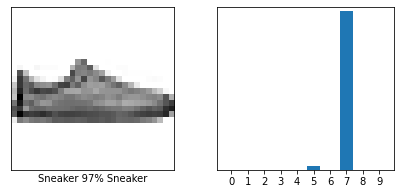

In [77]:
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
plot_image(12, predictions, y_test, x_test_visual)
plt.subplot(1, 2, 2)
plot_bars(12, predictions, y_test, x_test_visual)
plt.show()